##  Pattern Sliding Window

1. Given an array, find the average of all contiguous subarrays of size ‘K’ in it.<br>
Array: [1, 3, 2, 6, -1, 4, 1, 8, 2], K=5 <br>
Output: [2.2, 2.8, 2.4, 3.6, 2.8]

In [1]:

arr = [1, 3, 2, 6, -1, 4, 1, 8, 2]
K = 5


In [7]:

result = []
windowSum, windowStart = 0.0, 0

for windowEnd in range( len(arr) ):
    windowSum = windowSum + arr[windowEnd] # add the next elements
    # slide the window, we don't need to slide 
    if windowEnd >= K - 1:
        print( windowEnd)
        result.append( windowSum / K )
        windowSum = windowSum - arr[windowStart]
        
        windowStart = windowStart + 1
    
    
print( result )

4
5
6
7
8
[2.2, 2.8, 2.4, 3.6, 2.8]


### 2. Maximum Sum Subarray of Size K (easy)<br>
Problem Statement #<br>
Given an array of positive numbers and a positive number ‘k’, find the maximum sum of any contiguous subarray of size ‘k’.<br>


Input: [2, 1, 5, 1, 3, 2], k=3 <br>
Output: 9 <br>
Explanation: Subarray with maximum sum is [5, 1, 3].<br>

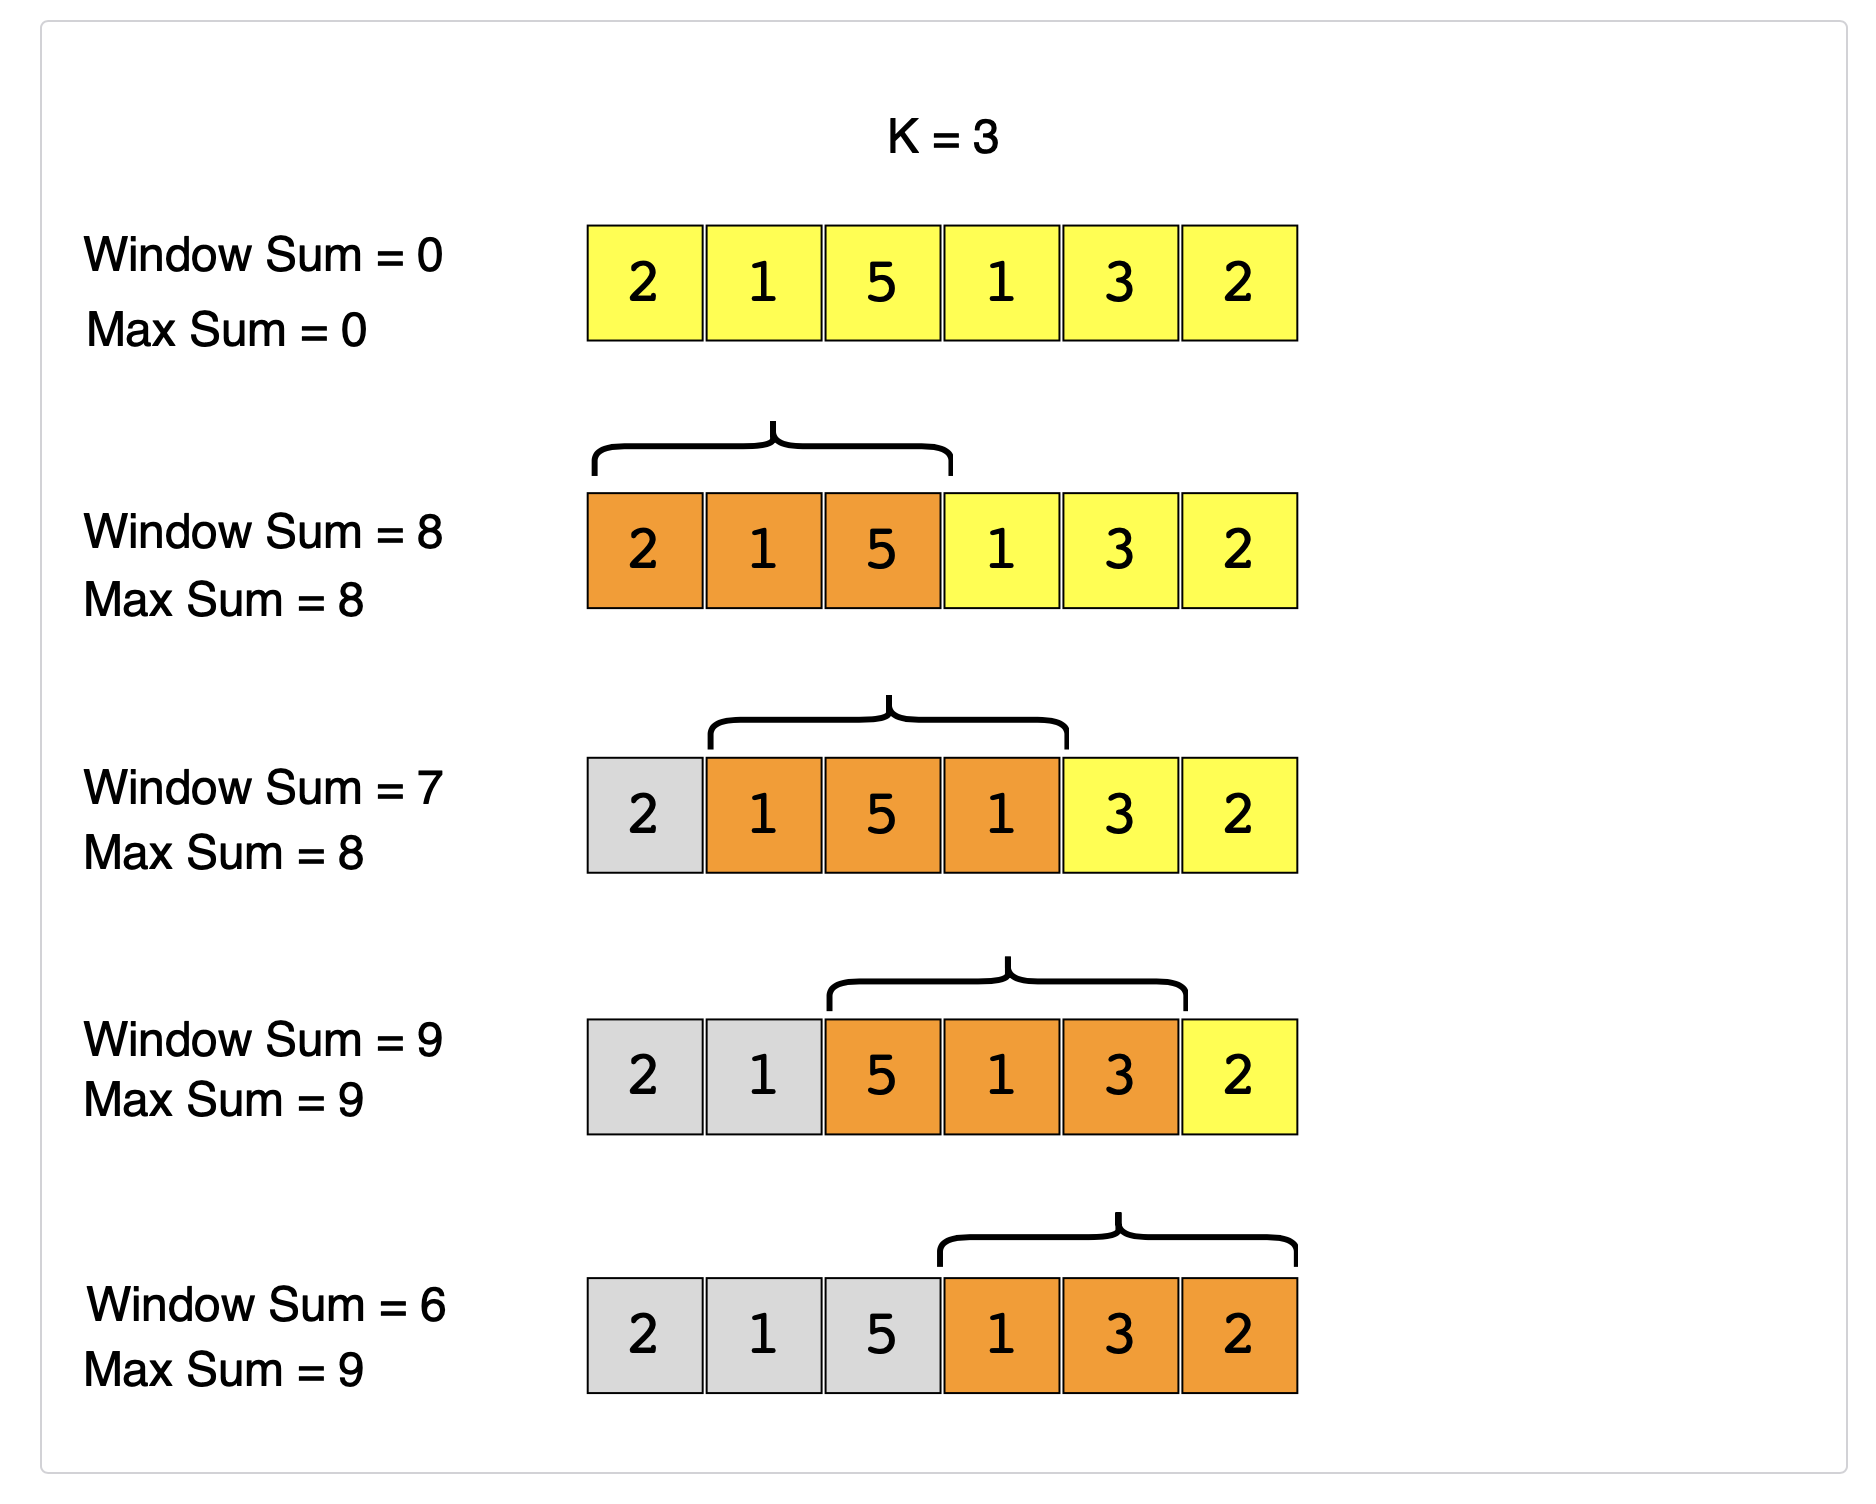

In [10]:
from IPython.display import display
from PIL import Image

path="/Users/harshavardhana/Desktop/maxsum.png"
display(Image.open(path))

In [13]:


def max_sub_array_of_size_k( arr, K ):
    max_sum, window_sum = 0,0
    window_start = 0
    
    for window_end in range( len( arr ) ):
        window_sum = window_sum + arr[window_end] # add next elements
        # slide the window, we don't need to slide
        if window_end >= K - 1:
            print("windowEnd", window_end)
            print( "compare b/w", max_sum, window_sum)
            max_sum = max( max_sum, window_sum )
            window_sum = window_sum - arr[window_start]
            window_start = window_start + 1
            
    return max_sum



print( max_sub_array_of_size_k( [2, 1, 5, 1, 3, 2], 3))      

windowEnd 2
compare b/w 0 8
windowEnd 3
compare b/w 8 7
windowEnd 4
compare b/w 8 9
windowEnd 5
compare b/w 9 6
9


### 3. Smallest Subarray with a given sum (easy)<br>

Problem Statement #
Given an array of positive numbers and a positive number ‘S’, find the length of the smallest contiguous subarray whose sum is greater than or equal to ‘S’. Return 0, if no such subarray exists.

Example 1:

Input: [2, 1, 5, 2, 3, 2], S=7 
Output: 2
Explanation: The smallest subarray with a sum great than or equal to '7' is [5, 2].
Example 2:

Input: [2, 1, 5, 2, 8], S=7 
Output: 1
Explanation: The smallest subarray with a sum greater than or equal to '7' is [8].
Example 3:

Input: [3, 4, 1, 1, 6], S=8 
Output: 3
Explanation: Smallest subarrays with a sum greater than or equal to '8' are [3, 4, 1] or [1, 1, 6].


1. First, we will add-up elements from the beginning of the array until their sum becomes greater than or equal to ‘S’.

2. These elements will constitute our sliding window. We are asked to find the smallest such window having a sum greater than or equal to ‘S’. We will remember the length of this window as the smallest window so far.

3. After this, we will keep adding one element in the sliding window (i.e. slide the window ahead), in a stepwise fashion.

4. In each step, we will also try to shrink the window from the beginning. We will shrink the window until the window’s sum is smaller than ‘S’ again. This is needed as we intend to find the smallest window. This shrinking will also happen in multiple steps; in each step we will do two things:
- Check if the current window length is the smallest so far, and if so, remember its length.
- Subtract the first element of the window from the running sum to shrink the sliding window.

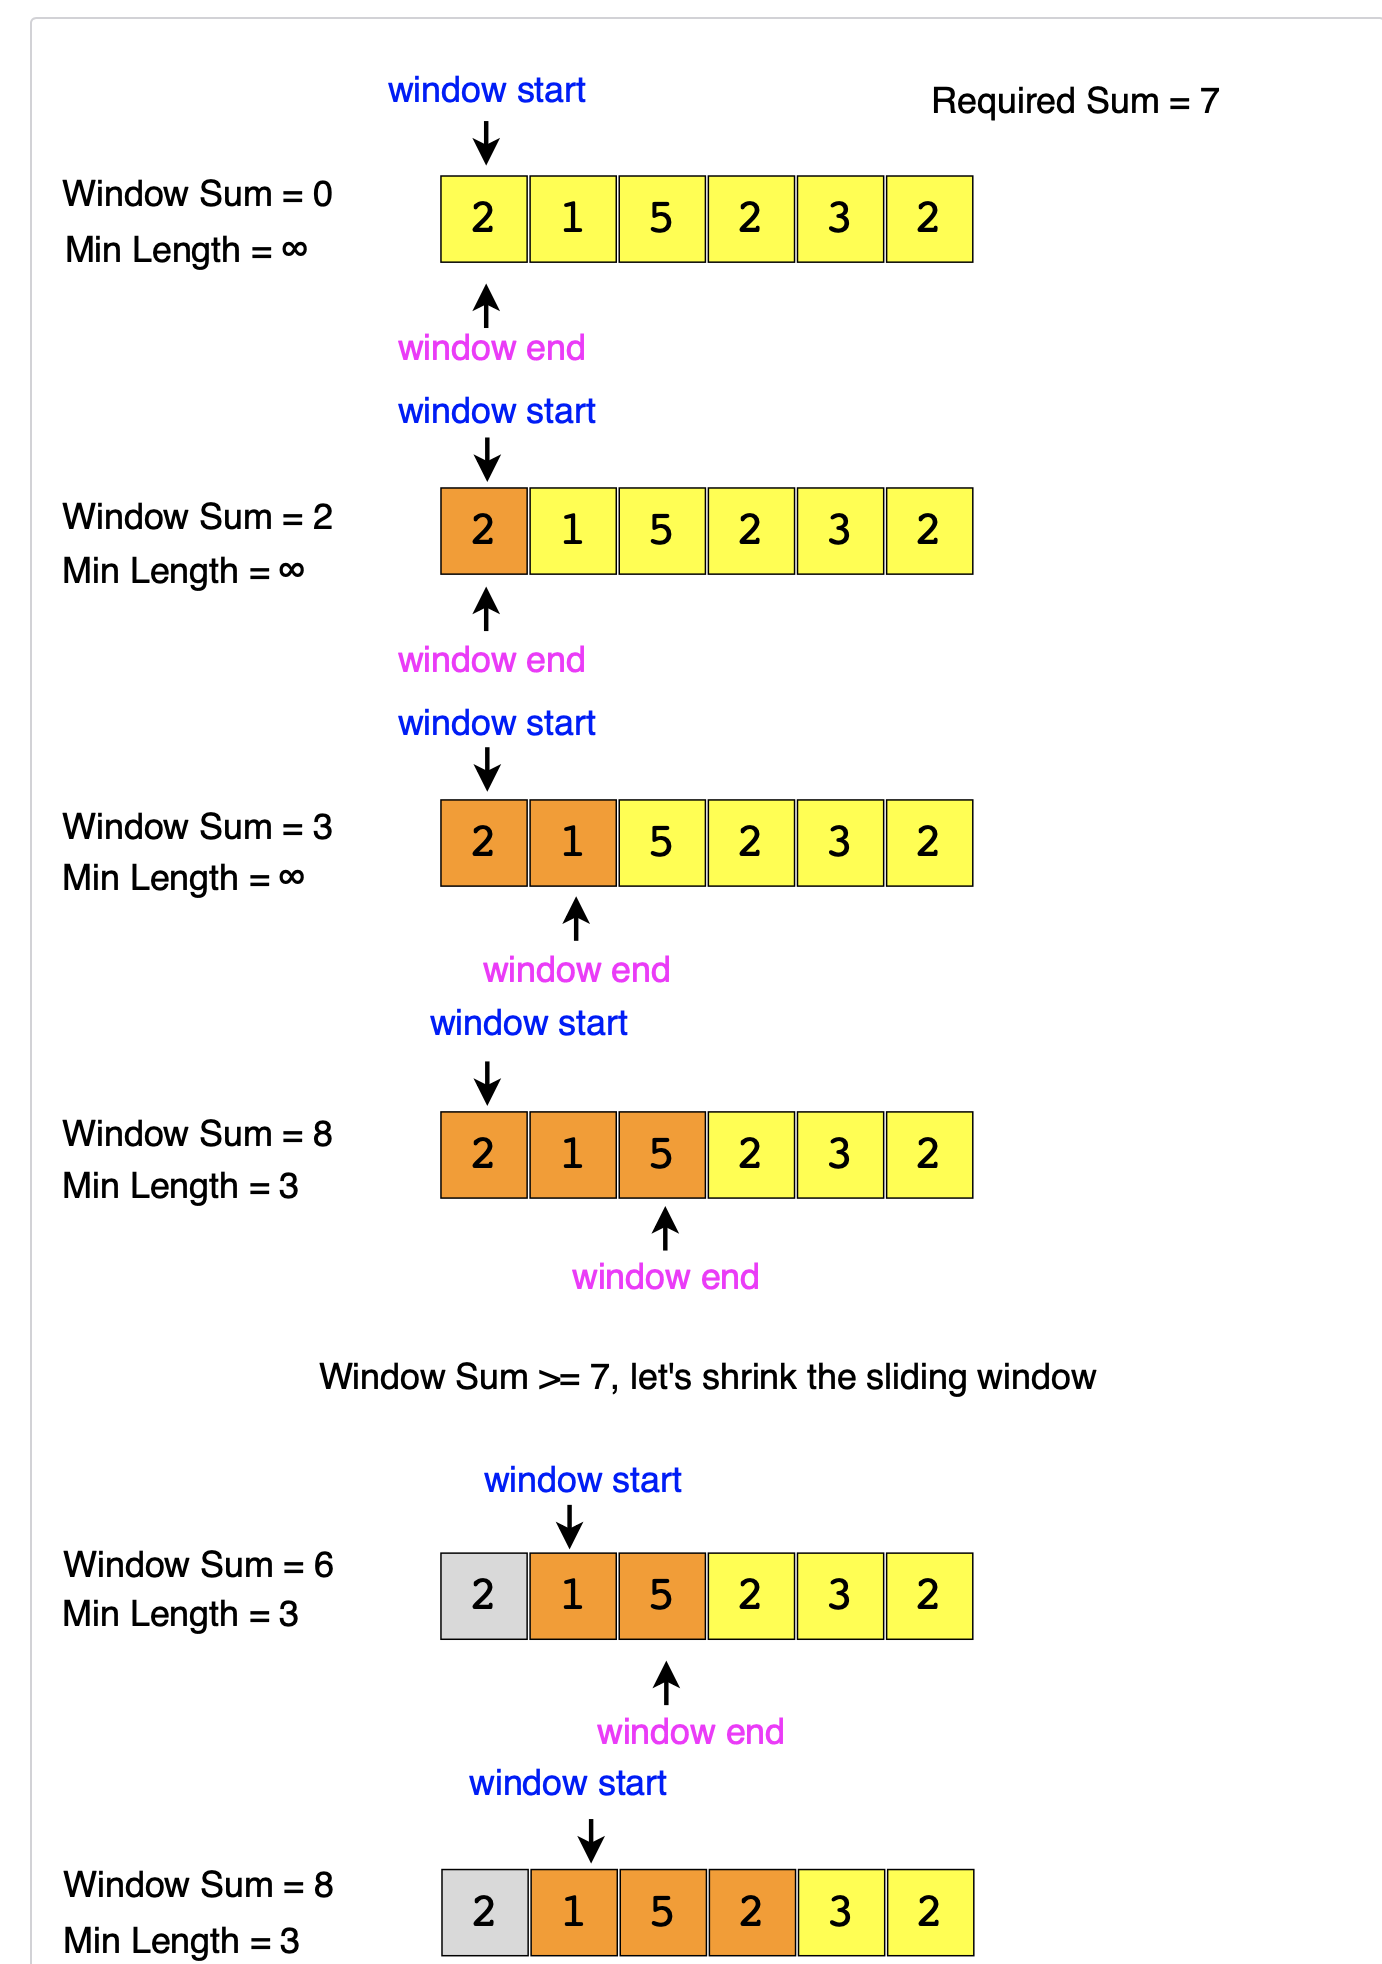

In [14]:
path="/Users/harshavardhana/Desktop/min.png"
display(Image.open(path))

In [17]:

import math

def smallest_subarray( s, arr ):
    window_sum = 0
    min_length = math.inf
    window_start = 0
    
    for window_end in range(0, len(arr)):
        window_sum = window_sum + arr[window_end]
        # shrink the window as small as possible until the 'window_sum' is smaller than 's'
        while window_sum >= s:
            min_length = min( min_length, window_end - window_start + 1 )
            window_sum = window_sum - arr[window_start]
            window_start = window_start + 1
            
    return min_length

print( smallest_subarray( 7, [2, 1, 5, 2, 3, 2] ) )

print(  smallest_subarray( 7, [2, 1, 5, 2, 8]) )

print( smallest_subarray( 8, [3, 4, 1, 1, 6] ))

2
1
3


The time complexity of the above algorithm will be 
O
(
N
)
O(N). The outer for loop runs for all elements and the inner while loop processes each element only once, therefore the time complexity of the algorithm will be 
O
(
N
+
N
)
O(N+N) which is asymptotically equivalent to 
O
(
N
)
O(N).

### 4. Longest Substring with K Distinct Characters (medium)

Problem Statement #
Given a string, find the length of the longest substring in it with no more than K distinct characters.

Example 1:

Input: String="araaci", K=2
Output: 4
Explanation: The longest substring with no more than '2' distinct characters is "araa".
Example 2:

Input: String="araaci", K=1
Output: 2
Explanation: The longest substring with no more than '1' distinct characters is "aa".
Example 3:

Input: String="cbbebi", K=3
Output: 5
Explanation: The longest substrings with no more than '3' distinct characters are "cbbeb" & "bbebi".

This problem follows the Sliding Window pattern and we can use a similar dynamic sliding window strategy as discussed in Smallest Subarray with a given sum. We can use a HashMap to remember the frequency of each character we have processed. Here is how we will solve this problem:

1. First, we will insert characters from the beginning of the string until we have ‘K’ distinct characters in the HashMap.
2. These characters will constitute our sliding window. We are asked to find the longest such window having no more than ‘K’ distinct characters. We will remember the length of this window as the longest window so far.
3. After this, we will keep adding one character in the sliding window (i.e. slide the window ahead), in a stepwise fashion.
4. In each step, we will try to shrink the window from the beginning if the count of distinct characters in the HashMap is larger than ‘K’. We will shrink the window until we have no more than ‘K’ distinct characters in the HashMap. This is needed as we intend to find the longest window.
5. While shrinking, we’ll decrement the frequency of the character going out of the window and remove it from the HashMap if its frequency becomes zero.
6. At the end of each step, we’ll check if the current window length is the longest so far, and if so, remember its length.

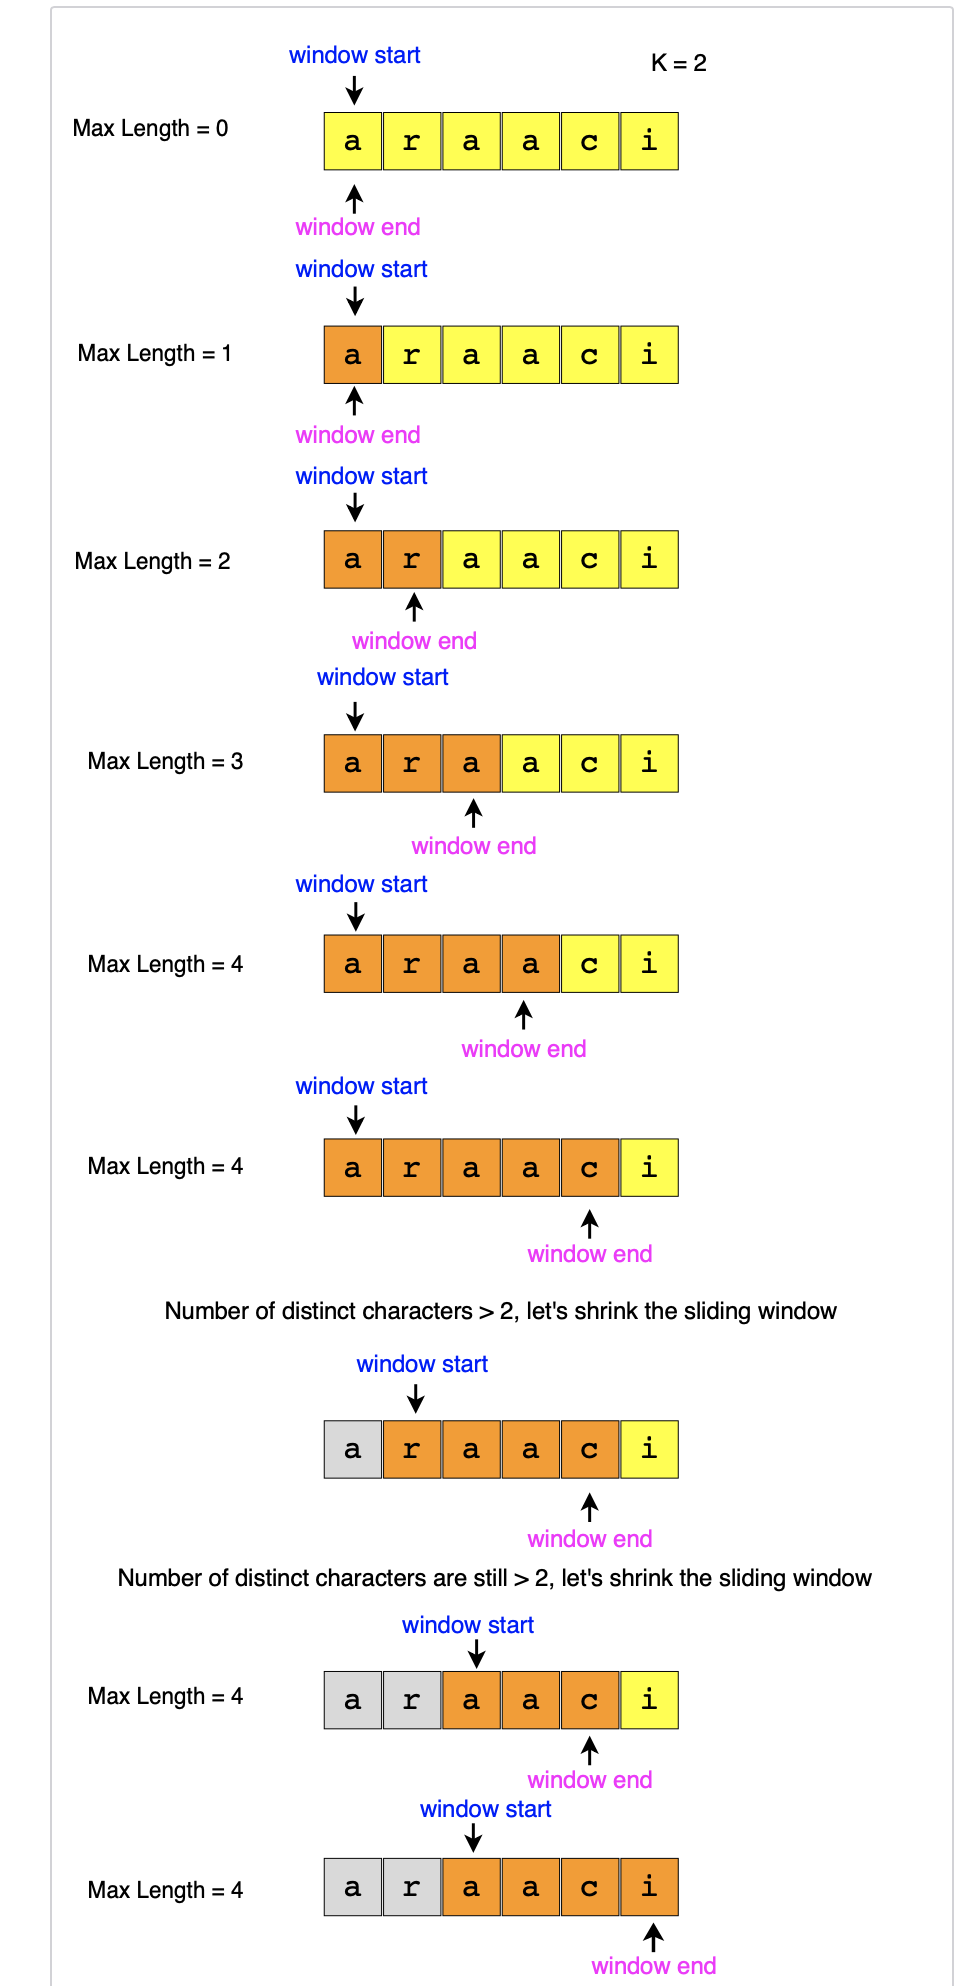

In [18]:
path="/Users/harshavardhana/Desktop/longest.png"
display(Image.open(path))

In [23]:

def longest_substring_with_k_distinct( test, K ):
    
    window_start = 0
    max_length = 0
    char_frequency = {}
    
    # will extend the range [ window-start, window-end]
    
    for window_end in range( len(test) ):
        right_char = test[window_end]
        if right_char not in char_frequency:
            char_frequency[right_char] = 0
        char_frequency[right_char] = char_frequency[right_char] + 1
        
        
        print( char_frequency )
    
        # shrink the sliding window, until we are left with 'k' disticnt characters in the char_frequency
        while len(char_frequency) > K:
            left_char = test[window_start]
            char_frequency[left_char] = char_frequency[left_char] - 1

            if char_frequency[left_char] == 0:
                del char_frequency[left_char]
            window_start = window_start + 1
        # remember the maximum length so far
        print( "compare",max_length, (window_end - window_start + 1) )
        max_length = max( max_length, window_end - window_start + 1 )
        
    return max_length



print( longest_substring_with_k_distinct( "araaci", 2))

        

{'a': 1}
compare 0 1
{'a': 1, 'r': 1}
compare 1 2
{'a': 2, 'r': 1}
compare 2 3
{'a': 3, 'r': 1}
compare 3 4
{'a': 3, 'r': 1, 'c': 1}
compare 4 3
{'a': 2, 'c': 1, 'i': 1}
compare 4 2
4


In [24]:
print( longest_substring_with_k_distinct( "araaci", 1))

{'a': 1}
compare 0 1
{'a': 1, 'r': 1}
compare 1 1
{'r': 1, 'a': 1}
compare 1 1
{'a': 2}
compare 1 2
{'a': 2, 'c': 1}
compare 2 1
{'c': 1, 'i': 1}
compare 2 1
2


In [25]:
print( longest_substring_with_k_distinct( "cbbebi", 3))

{'c': 1}
compare 0 1
{'c': 1, 'b': 1}
compare 1 2
{'c': 1, 'b': 2}
compare 2 3
{'c': 1, 'b': 2, 'e': 1}
compare 3 4
{'c': 1, 'b': 3, 'e': 1}
compare 4 5
{'c': 1, 'b': 3, 'e': 1, 'i': 1}
compare 5 5
5


The time complexity of the above algorithm will be 
O
(
N
)
O(N) where ‘N’ is the number of characters in the input string. The outer for loop runs for all characters and the inner while loop processes each character only once, therefore the time complexity of the algorithm will be 
O
(
N
+
N
)
O(N+N) which is asymptotically equivalent to 
O
(
N
)
O(N).

## 5. No-repeat Substring <br>
Problem Statement #
Given a string, find the length of the longest substring which has no repeating characters.

Example 1:

Input: String="aabccbb"
Output: 3
Explanation: The longest substring without any repeating characters is "abc".
Example 2:

Input: String="abbbb"
Output: 2
Explanation: The longest substring without any repeating characters is "ab".
Example 3:

Input: String="abccde"
Output: 3
Explanation: Longest substrings without any repeating characters are "abc" & "cde".

This problem follows the Sliding Window pattern and we can use a similar dynamic sliding window strategy as discussed in Longest Substring with K Distinct Characters. We can use a HashMap to remember the last index of each character we have processed. Whenever we get a repeating character we will shrink our sliding window to ensure that we always have distinct characters in the sliding window.

In [29]:

def non_repeat_substring( name ):
    window_start = 0
    max_length = 0
    char_index_map = {}
    
    # try to extend the range [window_start, window_end]
    for window_end in range( len( name ) ):
        right_char = name[window_end]
        # if the map already contains the 'right_char', shrink the window from the beginning
        # so that we have only occurance of 'right_char'
        
        if right_char in char_index_map:
            window_start = max( window_start, char_index_map[right_char] + 1 )
        # insert the 'right_char' into map
        char_index_map[right_char] = window_end
        # remeber the maximum length so far
        max_length = max( max_length, window_end - window_start + 1 )
        
    return max_length



print( non_repeat_substring('aabccbb') )
print( non_repeat_substring('abbbb') )
print( non_repeat_substring('abccde') )

3
2
3
